# Lab 1.4: Basic Neuron Implementation

## Duration: 45 minutes

## Learning Objectives
By the end of this lab, you will be able to:
- Understand the structure and components of an artificial neuron
- Implement a complete neuron from scratch using NumPy
- Combine linear transformations with activation functions
- Test neurons with different inputs and configurations
- Build the foundation for neural network layers

## Prerequisites
- Completed Lab 1.1 (Environment Setup)
- Completed Lab 1.2 (Mathematical Foundations)
- Completed Lab 1.3 (Activation Functions)
- Understanding of matrix operations and activation functions

---

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib
%matplotlib inline
plt.style.use('default')

print("Environment ready for neuron implementation!")

Environment ready for neuron implementation!


## Part 1: Understanding the Artificial Neuron

Let's start by understanding the mathematical model of an artificial neuron.

PART 1: ANATOMY OF AN ARTIFICIAL NEURON

🧠 Artificial Neuron Components:

1. INPUTS (x₁, x₂, ..., xₙ):
   - Features from previous layer or raw data
   - Can be any real numbers

2. WEIGHTS (w₁, w₂, ..., wₙ):
   - Learnable parameters
   - Determine the importance of each input
   - Adjusted during training

3. BIAS (b):
   - Additional learnable parameter
   - Shifts the activation function
   - Allows neuron to fire even with zero inputs

4. LINEAR COMBINATION (z):
   - z = w₁x₁ + w₂x₂ + ... + wₙxₙ + b
   - z = Σ(wᵢxᵢ) + b = w·x + b

5. ACTIVATION FUNCTION (f):
   - Applies non-linearity: a = f(z)
   - Common choices: sigmoid, tanh, ReLU

6. OUTPUT (a):
   - Final neuron output: a = f(w·x + b)
   - Becomes input to next layer



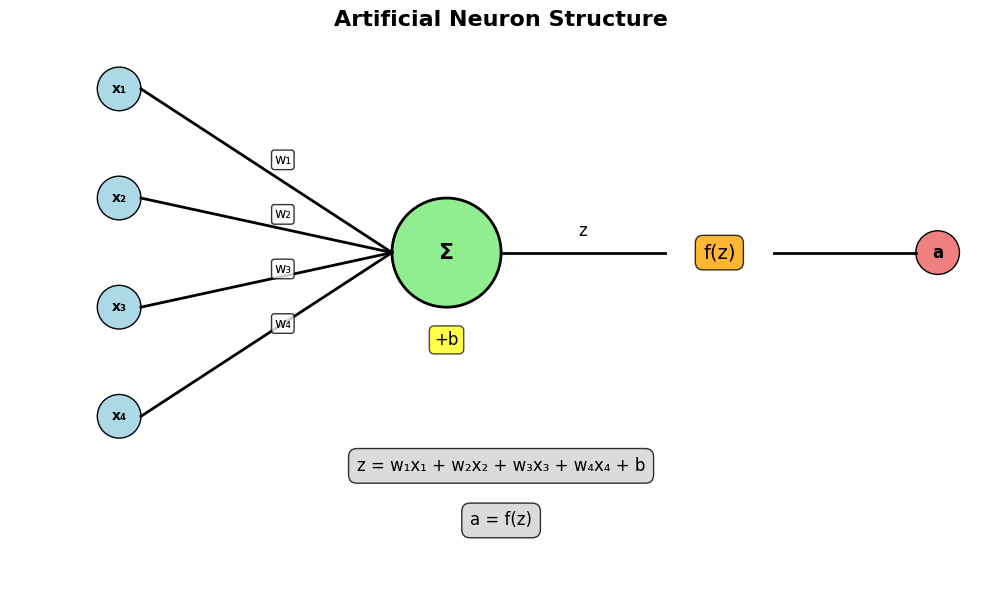


💡 This is the fundamental building block of neural networks!


In [2]:
print("=" * 45)
print("PART 1: ANATOMY OF AN ARTIFICIAL NEURON")
print("=" * 45)

print("""
🧠 Artificial Neuron Components:

1. INPUTS (x₁, x₂, ..., xₙ):
   - Features from previous layer or raw data
   - Can be any real numbers

2. WEIGHTS (w₁, w₂, ..., wₙ):
   - Learnable parameters
   - Determine the importance of each input
   - Adjusted during training

3. BIAS (b):
   - Additional learnable parameter
   - Shifts the activation function
   - Allows neuron to fire even with zero inputs

4. LINEAR COMBINATION (z):
   - z = w₁x₁ + w₂x₂ + ... + wₙxₙ + b
   - z = Σ(wᵢxᵢ) + b = w·x + b

5. ACTIVATION FUNCTION (f):
   - Applies non-linearity: a = f(z)
   - Common choices: sigmoid, tanh, ReLU

6. OUTPUT (a):
   - Final neuron output: a = f(w·x + b)
   - Becomes input to next layer
""")

# Visual representation
fig, ax = plt.subplots(figsize=(12, 6))

# Draw neuron diagram
# Input nodes
input_positions = [(1, 4), (1, 3), (1, 2), (1, 1)]
input_labels = ['x₁', 'x₂', 'x₃', 'x₄']

# Draw inputs
for i, ((x, y), label) in enumerate(zip(input_positions, input_labels)):
    circle = plt.Circle((x, y), 0.2, color='lightblue', ec='black')
    ax.add_patch(circle)
    ax.text(x, y, label, ha='center', va='center', fontsize=10, fontweight='bold')

# Draw neuron
neuron_pos = (4, 2.5)
neuron_circle = plt.Circle(neuron_pos, 0.5, color='lightgreen', ec='black', linewidth=2)
ax.add_patch(neuron_circle)
ax.text(neuron_pos[0], neuron_pos[1], 'Σ', ha='center', va='center', fontsize=16, fontweight='bold')

# Draw connections with weights
weights = ['w₁', 'w₂', 'w₃', 'w₄']
for i, ((x1, y1), weight) in enumerate(zip(input_positions, weights)):
    x2, y2 = neuron_pos
    # Draw line
    ax.plot([x1 + 0.2, x2 - 0.5], [y1, y2], 'k-', linewidth=2)
    # Add weight label
    mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
    ax.text(mid_x, mid_y + 0.1, weight, ha='center', va='center', 
            fontsize=10, bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

# Draw bias
ax.text(neuron_pos[0], neuron_pos[1] - 0.8, '+b', ha='center', va='center', 
        fontsize=12, bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

# Draw activation function
act_pos = (6.5, 2.5)
ax.text(act_pos[0], act_pos[1], 'f(z)', ha='center', va='center', 
        fontsize=14, bbox=dict(boxstyle='round,pad=0.4', facecolor='orange', alpha=0.8))

# Draw connection to activation
ax.plot([neuron_pos[0] + 0.5, act_pos[0] - 0.5], [neuron_pos[1], act_pos[1]], 'k-', linewidth=2)
ax.text((neuron_pos[0] + act_pos[0]) / 2, neuron_pos[1] + 0.2, 'z', ha='center', va='center', fontsize=12)

# Draw output
output_pos = (8.5, 2.5)
output_circle = plt.Circle(output_pos, 0.2, color='lightcoral', ec='black')
ax.add_patch(output_circle)
ax.text(output_pos[0], output_pos[1], 'a', ha='center', va='center', fontsize=12, fontweight='bold')

# Draw final connection
ax.plot([act_pos[0] + 0.5, output_pos[0] - 0.2], [act_pos[1], output_pos[1]], 'k-', linewidth=2)

# Add equation
ax.text(4.5, 0.5, 'z = w₁x₁ + w₂x₂ + w₃x₃ + w₄x₄ + b', ha='center', fontsize=12, 
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))
ax.text(4.5, 0, 'a = f(z)', ha='center', fontsize=12,
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))

ax.set_xlim(0, 9)
ax.set_ylim(-0.5, 4.5)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Artificial Neuron Structure', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 This is the fundamental building block of neural networks!")

## Part 2: Implementing a Basic Neuron Class

Let's implement our first neuron from scratch.

In [3]:
print("=" * 40)
print("PART 2: BASIC NEURON IMPLEMENTATION")
print("=" * 40)

# First, let's import activation functions from our previous lab
def sigmoid(z):
    """Sigmoid activation function"""
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

def tanh(z):
    """Hyperbolic tangent activation function"""
    return np.tanh(z)

def relu(z):
    """ReLU activation function"""
    return np.maximum(0, z)

def linear(z):
    """Linear activation function"""
    return z

# Define activation function derivatives
def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def tanh_derivative(z):
    return 1 - np.tanh(z)**2

def relu_derivative(z):
    return (z > 0).astype(float)

def linear_derivative(z):
    return np.ones_like(z)

print("Activation functions ready!")

PART 2: BASIC NEURON IMPLEMENTATION
Activation functions ready!


In [4]:
class Neuron:
    """
    A single artificial neuron implementation
    """
    
    def __init__(self, n_inputs, activation='sigmoid', learning_rate=0.1):
        """
        Initialize neuron with random weights and zero bias
        
        Args:
            n_inputs (int): Number of input features
            activation (str): Activation function ('sigmoid', 'tanh', 'relu', 'linear')
            learning_rate (float): Learning rate for weight updates
        """
        self.n_inputs = n_inputs
        self.learning_rate = learning_rate
        
        # Initialize weights with small random values
        self.weights = np.random.randn(n_inputs) * 0.1
        
        # Initialize bias to zero
        self.bias = 0.0
        
        # Set activation function
        self.activation_name = activation
        self._set_activation_function(activation)
        
        # Store computation history for analysis
        self.last_input = None
        self.last_z = None
        self.last_output = None
    
    def _set_activation_function(self, activation):
        """Set the activation function and its derivative"""
        activation_functions = {
            'sigmoid': (sigmoid, sigmoid_derivative),
            'tanh': (tanh, tanh_derivative),
            'relu': (relu, relu_derivative),
            'linear': (linear, linear_derivative)
        }
        
        if activation not in activation_functions:
            raise ValueError(f"Unsupported activation function: {activation}")
        
        self.activation_func, self.activation_derivative = activation_functions[activation]
    
    def forward(self, inputs):
        """
        Forward pass: compute neuron output
        
        Args:
            inputs (np.array): Input features
        
        Returns:
            float: Neuron output
        """
        # Convert inputs to numpy array if needed
        inputs = np.array(inputs)
        
        # Check input dimensions
        if len(inputs) != self.n_inputs:
            raise ValueError(f"Expected {self.n_inputs} inputs, got {len(inputs)}")
        
        # Store input for later use
        self.last_input = inputs.copy()
        
        # Compute linear combination: z = w·x + b
        self.last_z = np.dot(self.weights, inputs) + self.bias
        
        # Apply activation function: a = f(z)
        self.last_output = self.activation_func(self.last_z)
        
        return self.last_output
    
    def get_parameters(self):
        """Return current weights and bias"""
        return {
            'weights': self.weights.copy(),
            'bias': self.bias,
            'activation': self.activation_name
        }
    
    def set_parameters(self, weights, bias):
        """Set weights and bias manually"""
        if len(weights) != self.n_inputs:
            raise ValueError(f"Expected {self.n_inputs} weights, got {len(weights)}")
        
        self.weights = np.array(weights).copy()
        self.bias = bias
    
    def get_computation_details(self):
        """Return details of last computation"""
        if self.last_input is None:
            return "No computation performed yet"
        
        return {
            'input': self.last_input,
            'weights': self.weights,
            'bias': self.bias,
            'linear_output': self.last_z,
            'activation_output': self.last_output,
            'activation_function': self.activation_name
        }

print("✅ Neuron class implemented successfully!")

✅ Neuron class implemented successfully!


## Part 3: Testing Our Neuron Implementation

Let's create and test neurons with different configurations.

In [5]:
print("=" * 35)
print("PART 3: TESTING NEURON IMPLEMENTATION")
print("=" * 35)

# Test 1: Simple 2-input neuron with sigmoid activation
print("\nTest 1: 2-input Sigmoid Neuron")
print("-" * 35)

# Create neuron
neuron1 = Neuron(n_inputs=2, activation='sigmoid')

# Set specific weights and bias for predictable results
neuron1.set_parameters(weights=[0.5, 0.3], bias=0.1)

print(f"Neuron parameters: {neuron1.get_parameters()}")

# Test with different inputs
test_inputs = [
    [1.0, 2.0],
    [0.0, 0.0],
    [-1.0, 1.0],
    [2.0, -1.0]
]

print("\nInput\t\t-> Output")
print("-" * 30)

for inputs in test_inputs:
    output = neuron1.forward(inputs)
    print(f"{inputs}\t-> {output:.4f}")
    
    # Show computation details for first input
    if inputs == test_inputs[0]:
        details = neuron1.get_computation_details()
        print(f"  Details: z = {details['linear_output']:.4f}, σ(z) = {details['activation_output']:.4f}")

PART 3: TESTING NEURON IMPLEMENTATION

Test 1: 2-input Sigmoid Neuron
-----------------------------------
Neuron parameters: {'weights': array([0.5, 0.3]), 'bias': 0.1, 'activation': 'sigmoid'}

Input		-> Output
------------------------------
[1.0, 2.0]	-> 0.7685
  Details: z = 1.2000, σ(z) = 0.7685
[0.0, 0.0]	-> 0.5250
[-1.0, 1.0]	-> 0.4750
[2.0, -1.0]	-> 0.6900


In [6]:
# Test 2: Compare different activation functions
print("\nTest 2: Different Activation Functions")
print("-" * 40)

# Create neurons with different activations
activations = ['sigmoid', 'tanh', 'relu', 'linear']
neurons = {}

# Same input for all neurons
test_input = [1.5, -0.8, 0.3]
weights = [0.4, -0.2, 0.6]
bias = 0.1

print(f"Input: {test_input}")
print(f"Weights: {weights}")
print(f"Bias: {bias}")
print("\nActivation\tLinear Output (z)\tFinal Output (a)")
print("-" * 55)

for activation in activations:
    # Create neuron
    neuron = Neuron(n_inputs=3, activation=activation)
    neuron.set_parameters(weights=weights, bias=bias)
    
    # Forward pass
    output = neuron.forward(test_input)
    
    # Get details
    details = neuron.get_computation_details()
    
    print(f"{activation:<10}\t{details['linear_output']:.4f}\t\t{details['activation_output']:.4f}")
    
    neurons[activation] = neuron

print("\n💡 Notice how the same linear output produces different final outputs!")


Test 2: Different Activation Functions
----------------------------------------
Input: [1.5, -0.8, 0.3]
Weights: [0.4, -0.2, 0.6]
Bias: 0.1

Activation	Linear Output (z)	Final Output (a)
-------------------------------------------------------
sigmoid   	1.0400		0.7389
tanh      	1.0400		0.7779
relu      	1.0400		1.0400
linear    	1.0400		1.0400

💡 Notice how the same linear output produces different final outputs!



Test 3: Neuron Response to Input Variations
---------------------------------------------
Input	Output
---------------
-5.0	0.0067
-2.0	0.1192
0.0	0.5000
2.0	0.8808
5.0	0.9933


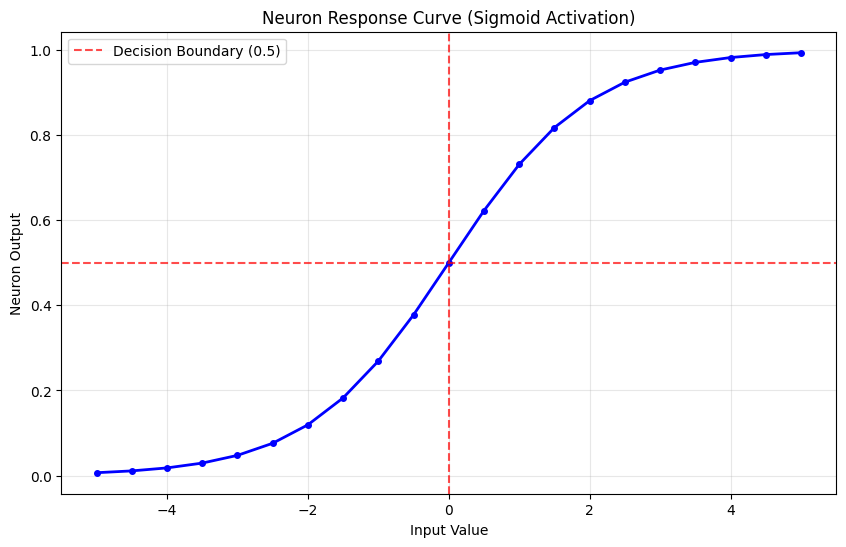


📈 This S-shaped curve is characteristic of sigmoid neurons!


In [7]:
# Test 3: Neuron behavior with varying inputs
print("\nTest 3: Neuron Response to Input Variations")
print("-" * 45)

# Create a neuron for testing
test_neuron = Neuron(n_inputs=1, activation='sigmoid')
test_neuron.set_parameters(weights=[1.0], bias=0.0)

# Generate range of inputs
input_range = np.linspace(-5, 5, 21)
outputs = []

print("Input\tOutput")
print("-" * 15)

for x in input_range:
    output = test_neuron.forward([x])
    outputs.append(output)
    if x in [-5, -2, 0, 2, 5]:  # Print only some values
        print(f"{x:.1f}\t{output:.4f}")

# Plot the neuron's response
plt.figure(figsize=(10, 6))
plt.plot(input_range, outputs, 'b-', linewidth=2, marker='o', markersize=4)
plt.xlabel('Input Value')
plt.ylabel('Neuron Output')
plt.title('Neuron Response Curve (Sigmoid Activation)')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Decision Boundary (0.5)')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

print("\n📈 This S-shaped curve is characteristic of sigmoid neurons!")

## Part 4: Understanding Neuron Decision Boundaries

Let's visualize how neurons make decisions with 2D inputs.

PART 4: NEURON DECISION BOUNDARIES
Classifier neuron parameters: {'weights': array([ 1. , -0.5]), 'bias': -0.2, 'activation': 'sigmoid'}
Decision boundary: points where output = 0.5 (z = 0)
Equation: 1.0*x₁ + (-0.5)*x₂ + (-0.2) = 0
Simplified: x₂ = 2*x₁ - 0.4


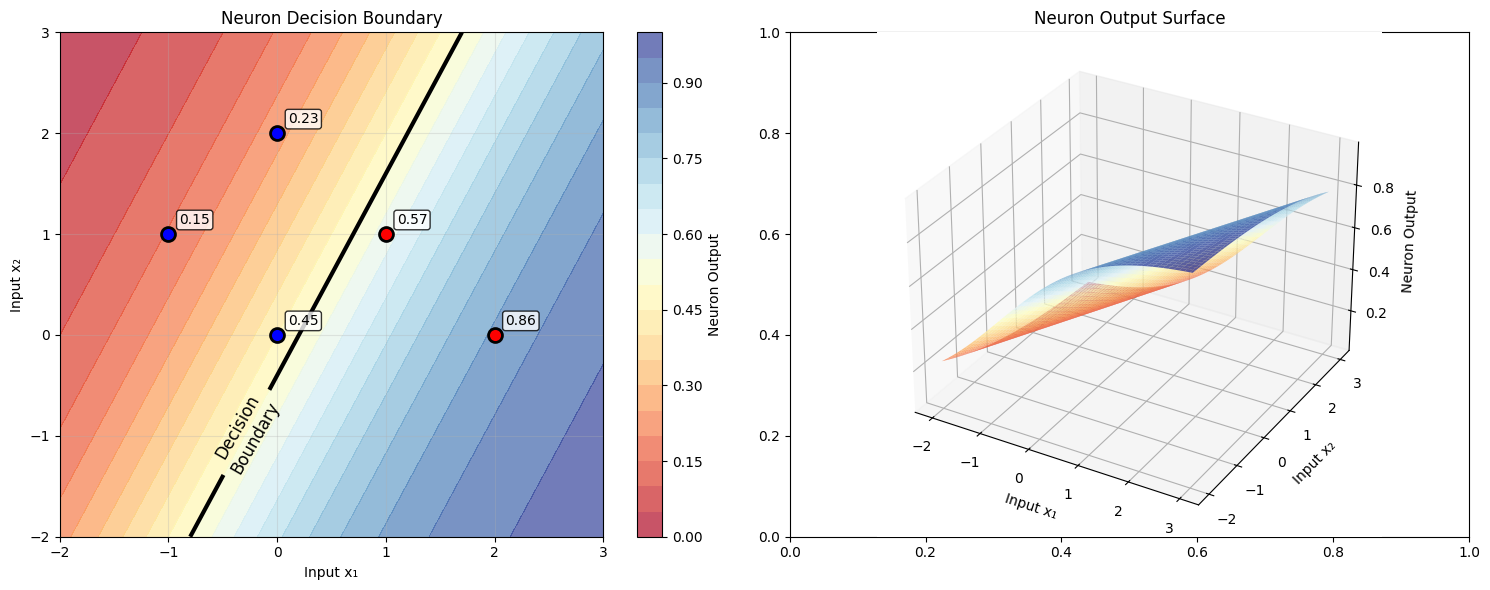


🎯 Key Observations:
   - Red points (output > 0.5): Classified as 'positive'
   - Blue points (output < 0.5): Classified as 'negative'
   - Black line: Decision boundary where output = 0.5
   - Linear decision boundary is a fundamental limitation of single neurons


In [8]:
print("=" * 40)
print("PART 4: NEURON DECISION BOUNDARIES")
print("=" * 40)

# Create a 2-input neuron for classification
classifier_neuron = Neuron(n_inputs=2, activation='sigmoid')

# Set weights that create an interesting decision boundary
classifier_neuron.set_parameters(weights=[1.0, -0.5], bias=-0.2)

print(f"Classifier neuron parameters: {classifier_neuron.get_parameters()}")
print("Decision boundary: points where output = 0.5 (z = 0)")
print("Equation: 1.0*x₁ + (-0.5)*x₂ + (-0.2) = 0")
print("Simplified: x₂ = 2*x₁ - 0.4")

# Create a grid of points
x1_range = np.linspace(-2, 3, 100)
x2_range = np.linspace(-2, 3, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Compute neuron output for each point
Z = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Z[i, j] = classifier_neuron.forward([X1[i, j], X2[i, j]])

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Contour plot showing decision regions
contour = ax1.contourf(X1, X2, Z, levels=20, cmap='RdYlBu', alpha=0.7)
decision_boundary = ax1.contour(X1, X2, Z, levels=[0.5], colors='black', linewidths=3)
ax1.clabel(decision_boundary, inline=True, fontsize=12, fmt='Decision\nBoundary')

# Add some test points
test_points = np.array([[0, 0], [1, 1], [2, 0], [0, 2], [-1, 1]])
for point in test_points:
    output = classifier_neuron.forward(point)
    color = 'red' if output > 0.5 else 'blue'
    ax1.plot(point[0], point[1], 'o', color=color, markersize=10, 
            markeredgecolor='black', markeredgewidth=2)
    ax1.text(point[0]+0.1, point[1]+0.1, f'{output:.2f}', fontsize=10, 
            bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

ax1.set_xlabel('Input x₁')
ax1.set_ylabel('Input x₂')
ax1.set_title('Neuron Decision Boundary')
ax1.grid(True, alpha=0.3)
plt.colorbar(contour, ax=ax1, label='Neuron Output')

# Plot 2: 3D surface showing neuron output
ax2 = fig.add_subplot(122, projection='3d')
surface = ax2.plot_surface(X1, X2, Z, cmap='RdYlBu', alpha=0.8)
ax2.set_xlabel('Input x₁')
ax2.set_ylabel('Input x₂')
ax2.set_zlabel('Neuron Output')
ax2.set_title('Neuron Output Surface')

plt.tight_layout()
plt.show()

print("\n🎯 Key Observations:")
print("   - Red points (output > 0.5): Classified as 'positive'")
print("   - Blue points (output < 0.5): Classified as 'negative'")
print("   - Black line: Decision boundary where output = 0.5")
print("   - Linear decision boundary is a fundamental limitation of single neurons")

## Part 5: Multiple Neurons Working Together

Let's see what happens when we combine multiple neurons.

In [9]:
print("=" * 40)
print("PART 5: MULTIPLE NEURONS (SIMPLE LAYER)")
print("=" * 40)

# Create a simple layer with 3 neurons
class SimpleLayer:
    """A simple layer containing multiple neurons"""
    
    def __init__(self, n_inputs, n_neurons, activation='sigmoid'):
        self.neurons = []
        for _ in range(n_neurons):
            neuron = Neuron(n_inputs, activation)
            self.neurons.append(neuron)
        
        self.n_inputs = n_inputs
        self.n_neurons = n_neurons
    
    def forward(self, inputs):
        """Forward pass through all neurons"""
        outputs = []
        for neuron in self.neurons:
            output = neuron.forward(inputs)
            outputs.append(output)
        return np.array(outputs)
    
    def get_all_parameters(self):
        """Get parameters of all neurons"""
        params = []
        for i, neuron in enumerate(self.neurons):
            params.append(f"Neuron {i+1}: {neuron.get_parameters()}")
        return params

# Create a layer with 3 neurons
layer = SimpleLayer(n_inputs=2, n_neurons=3, activation='sigmoid')

# Set different parameters for each neuron
layer.neurons[0].set_parameters(weights=[1.0, 0.5], bias=0.0)   # Neuron 1
layer.neurons[1].set_parameters(weights=[0.3, -0.8], bias=0.2)  # Neuron 2
layer.neurons[2].set_parameters(weights=[-0.6, 0.4], bias=-0.1) # Neuron 3

print("Layer Configuration:")
for param in layer.get_all_parameters():
    print(f"  {param}")

# Test the layer with different inputs
test_inputs = [
    [1.0, 0.0],
    [0.0, 1.0], 
    [1.0, 1.0],
    [-1.0, 0.5]
]

print("\nLayer Testing:")
print("-" * 50)
print(f"{'Input':<15} | {'Neuron 1':<10} | {'Neuron 2':<10} | {'Neuron 3':<10}")
print("-" * 50)

for inputs in test_inputs:
    outputs = layer.forward(inputs)
    print(f"{str(inputs):<15} | {outputs[0]:.4f}     | {outputs[1]:.4f}     | {outputs[2]:.4f}")

print("\n💡 Each neuron responds differently to the same input!")
print("   This creates a richer representation than a single neuron.")

PART 5: MULTIPLE NEURONS (SIMPLE LAYER)
Layer Configuration:
  Neuron 1: {'weights': array([1. , 0.5]), 'bias': 0.0, 'activation': 'sigmoid'}
  Neuron 2: {'weights': array([ 0.3, -0.8]), 'bias': 0.2, 'activation': 'sigmoid'}
  Neuron 3: {'weights': array([-0.6,  0.4]), 'bias': -0.1, 'activation': 'sigmoid'}

Layer Testing:
--------------------------------------------------
Input           | Neuron 1   | Neuron 2   | Neuron 3  
--------------------------------------------------
[1.0, 0.0]      | 0.7311     | 0.6225     | 0.3318
[0.0, 1.0]      | 0.6225     | 0.3543     | 0.5744
[1.0, 1.0]      | 0.8176     | 0.4256     | 0.4256
[-1.0, 0.5]     | 0.3208     | 0.3775     | 0.6682

💡 Each neuron responds differently to the same input!
   This creates a richer representation than a single neuron.



Visualizing Multiple Decision Boundaries:
---------------------------------------------


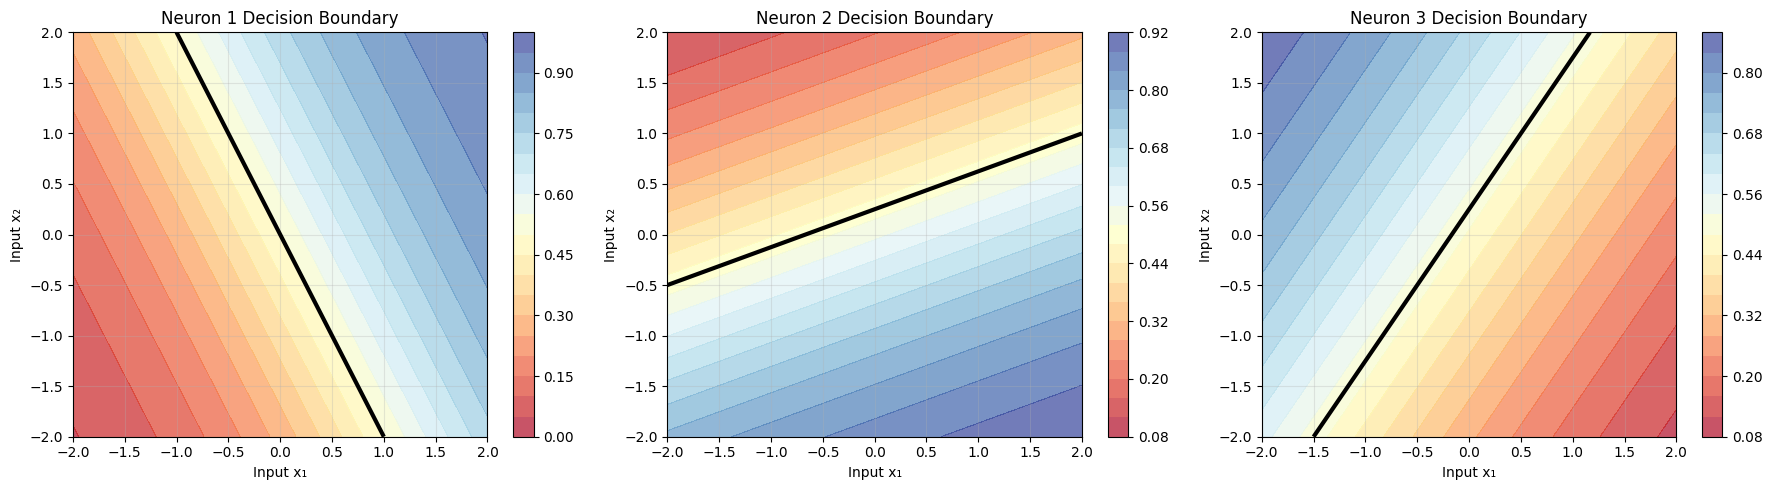


🧠 Notice how each neuron learns a different linear decision boundary!
   When combined, these can approximate more complex decision regions.


In [10]:
# Visualize how multiple neurons create different decision boundaries
print("\nVisualizing Multiple Decision Boundaries:")
print("-" * 45)

# Create grid for visualization
x1_range = np.linspace(-2, 2, 100)
x2_range = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Compute outputs for each neuron
Z1 = np.zeros_like(X1)
Z2 = np.zeros_like(X1)
Z3 = np.zeros_like(X1)

for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        point = [X1[i, j], X2[i, j]]
        Z1[i, j] = layer.neurons[0].forward(point)
        Z2[i, j] = layer.neurons[1].forward(point)
        Z3[i, j] = layer.neurons[2].forward(point)

# Plot all three decision boundaries
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Neuron 1
im1 = axes[0].contourf(X1, X2, Z1, levels=20, cmap='RdYlBu', alpha=0.7)
axes[0].contour(X1, X2, Z1, levels=[0.5], colors='black', linewidths=3)
axes[0].set_title('Neuron 1 Decision Boundary')
axes[0].set_xlabel('Input x₁')
axes[0].set_ylabel('Input x₂')
axes[0].grid(True, alpha=0.3)
plt.colorbar(im1, ax=axes[0])

# Neuron 2
im2 = axes[1].contourf(X1, X2, Z2, levels=20, cmap='RdYlBu', alpha=0.7)
axes[1].contour(X1, X2, Z2, levels=[0.5], colors='black', linewidths=3)
axes[1].set_title('Neuron 2 Decision Boundary')
axes[1].set_xlabel('Input x₁')
axes[1].set_ylabel('Input x₂')
axes[1].grid(True, alpha=0.3)
plt.colorbar(im2, ax=axes[1])

# Neuron 3
im3 = axes[2].contourf(X1, X2, Z3, levels=20, cmap='RdYlBu', alpha=0.7)
axes[2].contour(X1, X2, Z3, levels=[0.5], colors='black', linewidths=3)
axes[2].set_title('Neuron 3 Decision Boundary')
axes[2].set_xlabel('Input x₁')
axes[2].set_ylabel('Input x₂')
axes[2].grid(True, alpha=0.3)
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.show()

print("\n🧠 Notice how each neuron learns a different linear decision boundary!")
print("   When combined, these can approximate more complex decision regions.")

## Part 6: Practical Example - Simple Pattern Recognition

Let's use our neurons to solve a simple pattern recognition problem.

PART 6: PATTERN RECOGNITION WITH NEURONS
Generated 100 data points
Class 0 (inside circle): 30 points
Class 1 (outside circle): 70 points

Testing Single Neuron Performance:
----------------------------------------
Vertical boundary   : Accuracy = 0.520
Horizontal boundary : Accuracy = 0.480
Diagonal boundary   : Accuracy = 0.460
Custom boundary     : Accuracy = 0.450

Best configuration: Vertical boundary (Accuracy: 0.520)


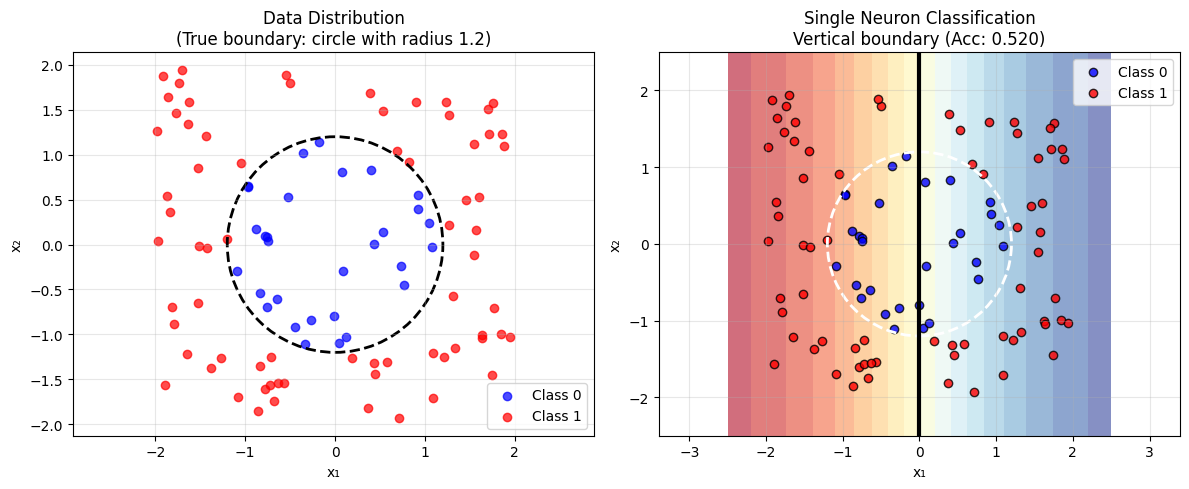


🤔 Limitation Observed:
   Single neurons can only create LINEAR decision boundaries!
   The true boundary is circular (non-linear), so accuracy is limited.
   This is why we need multiple layers and neurons!


In [11]:
print("=" * 50)
print("PART 6: PATTERN RECOGNITION WITH NEURONS")
print("=" * 50)

# Problem: Classify points based on their position relative to a circle
# Inside circle = class 0, Outside circle = class 1

# Generate synthetic data
np.random.seed(42)
n_samples = 100

# Generate random points
X = np.random.uniform(-2, 2, (n_samples, 2))

# Create labels based on distance from origin (circle with radius 1.2)
distances = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
y = (distances > 1.2).astype(int)  # 1 if outside circle, 0 if inside

print(f"Generated {n_samples} data points")
print(f"Class 0 (inside circle): {np.sum(y == 0)} points")
print(f"Class 1 (outside circle): {np.sum(y == 1)} points")

# Visualize the data
plt.figure(figsize=(12, 5))

# Plot 1: Data visualization
plt.subplot(1, 2, 1)
colors = ['blue', 'red']
for class_idx in [0, 1]:
    class_points = X[y == class_idx]
    plt.scatter(class_points[:, 0], class_points[:, 1], 
               c=colors[class_idx], label=f'Class {class_idx}', alpha=0.7)

# Draw the true decision boundary (circle)
circle = plt.Circle((0, 0), 1.2, fill=False, color='black', linewidth=2, linestyle='--')
plt.gca().add_patch(circle)

plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('Data Distribution\n(True boundary: circle with radius 1.2)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Now let's try to solve this with a single neuron
print("\nTesting Single Neuron Performance:")
print("-" * 40)

# Create a neuron for classification
pattern_neuron = Neuron(n_inputs=2, activation='sigmoid')

# Try different weight configurations manually
configurations = [
    {'weights': [1.0, 0.0], 'bias': 0.0, 'name': 'Vertical boundary'},
    {'weights': [0.0, 1.0], 'bias': 0.0, 'name': 'Horizontal boundary'},
    {'weights': [1.0, 1.0], 'bias': -1.0, 'name': 'Diagonal boundary'},
    {'weights': [0.8, 0.6], 'bias': -1.2, 'name': 'Custom boundary'}
]

best_accuracy = 0
best_config = None

for config in configurations:
    pattern_neuron.set_parameters(config['weights'], config['bias'])
    
    # Make predictions
    predictions = []
    for point in X:
        output = pattern_neuron.forward(point)
        prediction = 1 if output > 0.5 else 0
        predictions.append(prediction)
    
    predictions = np.array(predictions)
    accuracy = np.mean(predictions == y)
    
    print(f"{config['name']:<20}: Accuracy = {accuracy:.3f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_config = config

print(f"\nBest configuration: {best_config['name']} (Accuracy: {best_accuracy:.3f})")

# Visualize the best neuron's decision boundary
pattern_neuron.set_parameters(best_config['weights'], best_config['bias'])

# Create prediction grid
x1_range = np.linspace(-2.5, 2.5, 100)
x2_range = np.linspace(-2.5, 2.5, 100)
X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)
Z_grid = np.zeros_like(X1_grid)

for i in range(X1_grid.shape[0]):
    for j in range(X1_grid.shape[1]):
        Z_grid[i, j] = pattern_neuron.forward([X1_grid[i, j], X2_grid[i, j]])

# Plot 2: Neuron decision boundary
plt.subplot(1, 2, 2)
plt.contourf(X1_grid, X2_grid, Z_grid, levels=20, cmap='RdYlBu', alpha=0.6)
plt.contour(X1_grid, X2_grid, Z_grid, levels=[0.5], colors='black', linewidths=3)

# Plot data points
for class_idx in [0, 1]:
    class_points = X[y == class_idx]
    plt.scatter(class_points[:, 0], class_points[:, 1], 
               c=colors[class_idx], label=f'Class {class_idx}', alpha=0.8, edgecolor='black')

# Draw true boundary
circle = plt.Circle((0, 0), 1.2, fill=False, color='white', linewidth=2, linestyle='--')
plt.gca().add_patch(circle)

plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title(f'Single Neuron Classification\n{best_config["name"]} (Acc: {best_accuracy:.3f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.tight_layout()
plt.show()

print("\n🤔 Limitation Observed:")
print("   Single neurons can only create LINEAR decision boundaries!")
print("   The true boundary is circular (non-linear), so accuracy is limited.")
print("   This is why we need multiple layers and neurons!")

## Part 7: Performance Analysis and Optimization

Let's analyze the computational performance of our neuron implementation.

In [12]:
print("=" * 40)
print("PART 7: PERFORMANCE ANALYSIS")
print("=" * 40)

import time

# Test computational performance
def benchmark_neuron(n_inputs, n_tests=10000):
    """Benchmark neuron forward pass performance"""
    
    neuron = Neuron(n_inputs=n_inputs, activation='sigmoid')
    test_input = np.random.randn(n_inputs)
    
    # Warm up
    for _ in range(100):
        neuron.forward(test_input)
    
    # Benchmark
    start_time = time.time()
    for _ in range(n_tests):
        neuron.forward(test_input)
    end_time = time.time()
    
    total_time = end_time - start_time
    time_per_forward = total_time / n_tests
    
    return total_time, time_per_forward

# Test different input sizes
input_sizes = [2, 10, 50, 100, 500]
n_tests = 10000

print(f"Benchmarking {n_tests} forward passes:")
print("-" * 40)
print(f"{'Inputs':<8} | {'Total Time':<12} | {'Time/Forward':<15} | {'Forwards/sec':<12}")
print("-" * 60)

for size in input_sizes:
    total_time, time_per_forward = benchmark_neuron(size, n_tests)
    forwards_per_sec = 1 / time_per_forward
    
    print(f"{size:<8} | {total_time:<12.4f} | {time_per_forward:<15.6f} | {forwards_per_sec:<12.0f}")

print("\n⚡ Performance Insights:")
print("   - Forward pass time scales linearly with number of inputs")
print("   - Modern GPUs can handle millions of neurons in parallel")
print("   - Vectorization (next labs) will improve performance significantly")

PART 7: PERFORMANCE ANALYSIS
Benchmarking 10000 forward passes:
----------------------------------------
Inputs   | Total Time   | Time/Forward    | Forwards/sec
------------------------------------------------------------
2        | 0.0553       | 0.000006        | 180968      
10       | 0.0343       | 0.000003        | 291902      
50       | 0.0326       | 0.000003        | 306626      
100      | 0.0329       | 0.000003        | 304359      
500      | 0.0255       | 0.000003        | 391588      

⚡ Performance Insights:
   - Forward pass time scales linearly with number of inputs
   - Modern GPUs can handle millions of neurons in parallel
   - Vectorization (next labs) will improve performance significantly


In [13]:
# Memory usage analysis
print("\nMemory Usage Analysis:")
print("-" * 30)

def analyze_neuron_memory(n_inputs):
    """Analyze memory usage of a neuron"""
    
    neuron = Neuron(n_inputs=n_inputs)
    
    # Calculate parameter memory
    weights_memory = n_inputs * 8  # 8 bytes per float64
    bias_memory = 8  # 8 bytes for bias
    total_params_memory = weights_memory + bias_memory
    
    # Calculate activation memory (for storing intermediate results)
    activation_memory = 8 * 3  # input, z, output
    
    total_memory = total_params_memory + activation_memory
    
    return {
        'weights_memory': weights_memory,
        'bias_memory': bias_memory,
        'activation_memory': activation_memory,
        'total_memory': total_memory,
        'parameters': n_inputs + 1  # weights + bias
    }

print(f"{'Inputs':<8} | {'Parameters':<12} | {'Memory (bytes)':<15} | {'Memory (KB)':<12}")
print("-" * 55)

for size in input_sizes:
    memory_info = analyze_neuron_memory(size)
    memory_kb = memory_info['total_memory'] / 1024
    
    print(f"{size:<8} | {memory_info['parameters']:<12} | {memory_info['total_memory']:<15} | {memory_kb:<12.3f}")

print("\n💾 Memory Observations:")
print("   - Memory usage dominated by weight storage")
print("   - Each parameter requires 8 bytes (float64)")
print("   - Large networks require careful memory management")

# Estimate memory for a realistic network
print("\n🧠 Realistic Network Example:")
layers = [784, 256, 128, 64, 10]  # MNIST-like architecture
total_params = 0
total_memory = 0

print("Layer structure: Input(784) -> Hidden(256) -> Hidden(128) -> Hidden(64) -> Output(10)")
print("-" * 70)

for i in range(len(layers)-1):
    layer_params = layers[i] * layers[i+1] + layers[i+1]  # weights + biases
    layer_memory = layer_params * 8  # bytes
    total_params += layer_params
    total_memory += layer_memory
    
    print(f"Layer {i+1}: {layers[i]:>3} -> {layers[i+1]:>3} | {layer_params:>8} params | {layer_memory/1024:>8.1f} KB")

print("-" * 70)
print(f"Total parameters: {total_params:,}")
print(f"Total memory: {total_memory/1024:.1f} KB = {total_memory/(1024*1024):.2f} MB")
print("This is just for storing parameters - actual training requires much more memory!")


Memory Usage Analysis:
------------------------------
Inputs   | Parameters   | Memory (bytes)  | Memory (KB) 
-------------------------------------------------------
2        | 3            | 48              | 0.047       
10       | 11           | 112             | 0.109       
50       | 51           | 432             | 0.422       
100      | 101          | 832             | 0.812       
500      | 501          | 4032            | 3.938       

💾 Memory Observations:
   - Memory usage dominated by weight storage
   - Each parameter requires 8 bytes (float64)
   - Large networks require careful memory management

🧠 Realistic Network Example:
Layer structure: Input(784) -> Hidden(256) -> Hidden(128) -> Hidden(64) -> Output(10)
----------------------------------------------------------------------
Layer 1: 784 -> 256 |   200960 params |   1570.0 KB
Layer 2: 256 -> 128 |    32896 params |    257.0 KB
Layer 3: 128 ->  64 |     8256 params |     64.5 KB
Layer 4:  64 ->  10 |      650 pa

## Progress Checklist

Mark each concept as understood:

- [ ] Structure of an artificial neuron (inputs, weights, bias, activation)
- [ ] Implementation of Neuron class with forward pass
- [ ] Testing neurons with different activation functions
- [ ] Understanding decision boundaries created by single neurons
- [ ] Combining multiple neurons in a simple layer
- [ ] Limitations of linear decision boundaries
- [ ] Pattern recognition example with real data
- [ ] Performance analysis and computational considerations
- [ ] Memory usage and scalability insights
- [ ] Foundation for building neural network layers

## Troubleshooting

### Common Issues:

**1. Dimension mismatch errors:**
- Check that input size matches neuron's expected input dimensions
- Verify weight vector length equals number of inputs

**2. Numerical overflow in activation functions:**
- Ensure activation functions handle extreme values properly
- Consider gradient clipping for very large weights

**3. Poor classification performance:**
- Remember single neurons can only create linear boundaries
- Try different weight initializations
- Consider if problem requires multiple neurons/layers

**4. Slow performance:**
- Profile code to identify bottlenecks
- Consider vectorized operations (covered in next labs)

**5. Visualization issues:**
- Ensure matplotlib backend supports interactive plots
- Check that grid resolution is appropriate

## Key Concepts Summary

1. **Artificial Neuron**: Mathematical model combining linear transformation and non-linear activation
2. **Forward Pass**: Computing output through weights → linear combination → activation
3. **Decision Boundaries**: Single neurons create linear decision boundaries
4. **Multiple Neurons**: Combining neurons creates richer representations
5. **Linear Limitations**: Single neurons cannot solve non-linearly separable problems
6. **Computational Complexity**: Performance scales with input size and network depth
7. **Memory Requirements**: Dominated by parameter storage, grows with network size
8. **Foundation Building**: Neurons are building blocks for larger networks

## Next Steps

In the next lab, we'll visualize neural networks and understand how multiple neurons and layers work together to create complex decision boundaries and solve non-linear problems.

---

**Congratulations! You've successfully implemented and analyzed artificial neurons from scratch!**